In [5]:
import numpy as np
from matplotlib import image
from matplotlib import pyplot as plt
import os

In [16]:
classes = os.listdir('./Test/')

In [17]:
# Loading train data into numpy array
x_train = []
y_train = []
for i in range(10):
    print(i)
    c=0
    for j in os.listdir("./Train/" + "digit_" + str(i)):
        c+=1
        img = image.imread("./Train/" + 'digit_' + str(i) + "/"+ j)
        x_train.append(img)
        y_train.append(i)
    print(c)
    
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = x_train.reshape(17000, 1, 32, 32)

0
1700
1
1700
2
1700
3
1700
4
1700
5
1700
6
1700
7
1700
8
1700
9
1700


In [18]:
# Load test data
x_test = []
y_test = []
for i in range(10):
    print(i)
    c=0
    for j in os.listdir("./Test/" + "digit_" + str(i)):
        c+=1
        img = image.imread("./Test/" + 'digit_' + str(i) + "/"+ j)
        x_test.append(img)
        y_test.append(i)
    print(c)
    
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test = x_test.reshape(3000, 1, 32, 32)

0
300
1
300
2
300
3
300
4
300
5
300
6
300
7
300
8
300
9
300


9


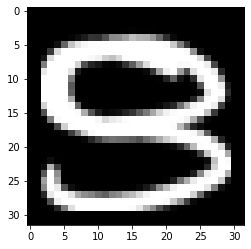

In [19]:
i = 2700

plt.imshow(x_test[i].reshape(32,32), cmap='gray')
print(y_test[i])

In [20]:
dataset = np.array([x_train, y_train, x_test, y_test])

In [21]:
np.save("data", dataset)

In [22]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 32
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 32, 32

# the data, split between train and test sets
# (x_train, y_train), (x_test, y_test) = ((X_train, y_train), (X_test, y_test))

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (17000, 32, 32, 1)
17000 train samples
3000 test samples
Train on 17000 samples, validate on 3000 samples
Epoch 1/12
17000/17000 [==============================] - 35s 2ms/step - loss: 0.3153 - accuracy: 0.8979 - val_loss: 0.0541 - val_accuracy: 0.9853
Epoch 2/12
17000/17000 [==============================] - 34s 2ms/step - loss: 0.0867 - accuracy: 0.9729 - val_loss: 0.0307 - val_accuracy: 0.9910
Epoch 3/12
17000/17000 [==============================] - 33s 2ms/step - loss: 0.0529 - accuracy: 0.9841 - val_loss: 0.0299 - val_accuracy: 0.9920
Epoch 4/12
17000/17000 [==============================] - 35s 2ms/step - loss: 0.0382 - accuracy: 0.9886 - val_loss: 0.0303 - val_accuracy: 0.9923
Epoch 5/12
17000/17000 [==============================] - 35s 2ms/step - loss: 0.0294 - accuracy: 0.9910 - val_loss: 0.0269 - val_accuracy: 0.9927
Epoch 6/12
17000/17000 [==============================] - 35s 2ms/step - loss: 0.0249 - accuracy: 0.9925 - val_loss: 0.0298 - val_accuracy: 0.99